In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,8
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [ ]:
df.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [ ]:
df.shape

(476, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [ ]:
df.isna().sum()

Month                      0
Monthly beer production    0
dtype: int64

In [ ]:
# Parsing string to datetime
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values(by=['Month'])
df.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly beer production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.2 KB


In [ ]:
# Data Resampling
# weekly_data = df.resample('W', on='Month').sum()
# weekly_data.head(10)
quarterly_data = df.resample('Q', on='Month').sum()
quarterly_data.head(10)

,Monthly beer production
Month,
1956-03-31,284.4
1956-06-30,212.8
1956-09-30,226.9
1956-12-31,308.4
1957-03-31,262.0
1957-06-30,227.9
1957-09-30,236.1
1957-12-31,320.4
1958-03-31,271.9


In [ ]:
df = df.set_index('Month')
df.columns = ['Monthly_beer_production']
df

,Monthly_beer_production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


<AxesSubplot:xlabel='Month'>

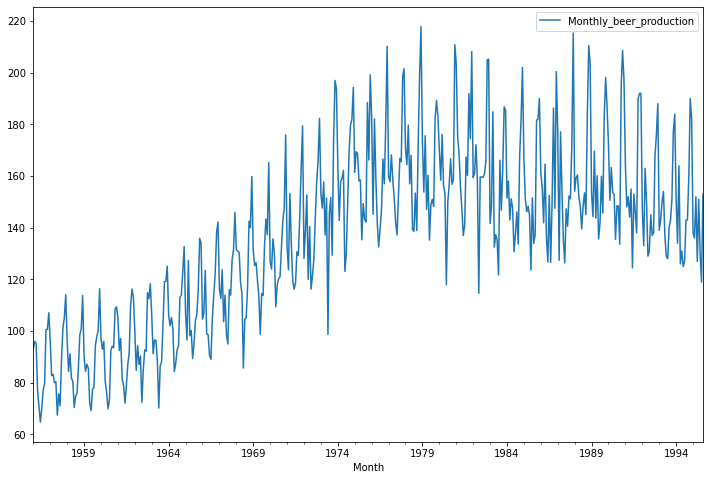

In [ ]:
df.plot()

In [ ]:
df.head(36)

,Monthly_beer_production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
1956-06-01,64.8
1956-07-01,70.1
1956-08-01,77.3
1956-09-01,79.5


In [ ]:
H0: Null hypothesis >> TS is not stationary, When pvalue > 0.05
Ha: Alternate hypothesis >> Ts is stationary, when pvalue < 0.05

In [ ]:
from statsmodels.tsa.stattools import adfuller
x = df['Monthly_beer_production'].values
result = adfuller(x)
print('Pvalue : ', round(result[1],3))
print('ADF Statistics:', round(result[0],3))
for key, value in result[4].items():
    print('\t:',key,value)

Pvalue :  0.178
ADF Statistics: -2.283
	: 1% -3.4447087976702284
	: 5% -2.867871300049488
	: 10% -2.5701423432047443


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)


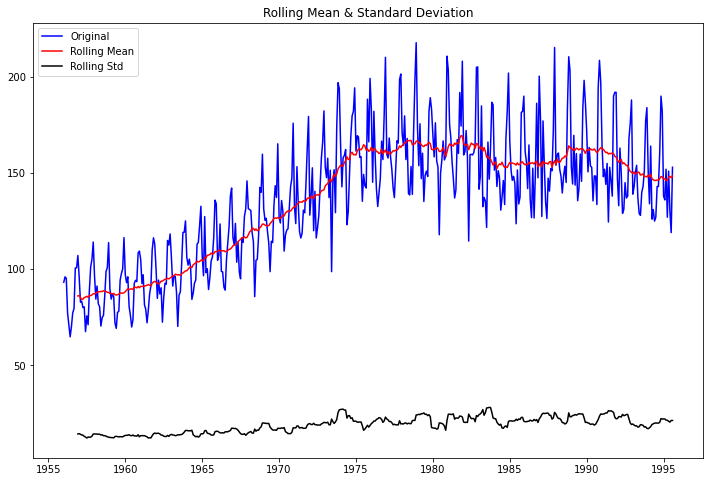

Results of Dickey-Fuller Test:
p-value = 0.2842. The series is likely non-stationary.
Test Statistic                  -2.005361
p-value                          0.284227
#Lags Used                      20.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64


In [ ]:
test_stationarity(df['Monthly_beer_production'])

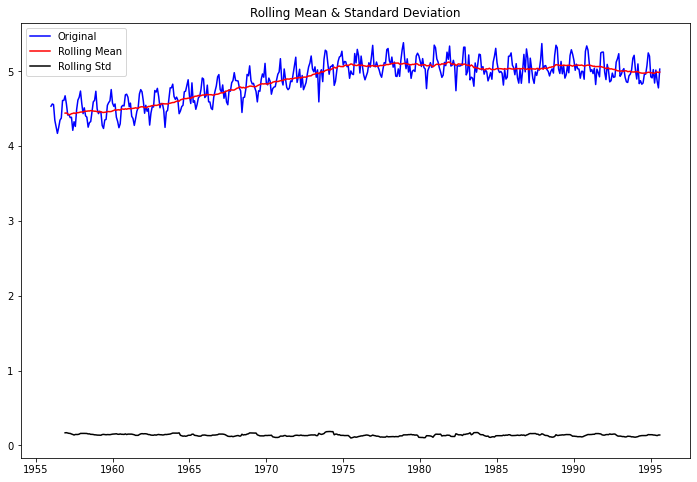

Results of Dickey-Fuller Test:
p-value = 0.1576. The series is likely non-stationary.
Test Statistic                  -2.346001
p-value                          0.157561
#Lags Used                      20.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64


In [ ]:
# make data stationary by transformation
df['log'] = np.log(df['Monthly_beer_production'])
test_stationarity(df['log'])

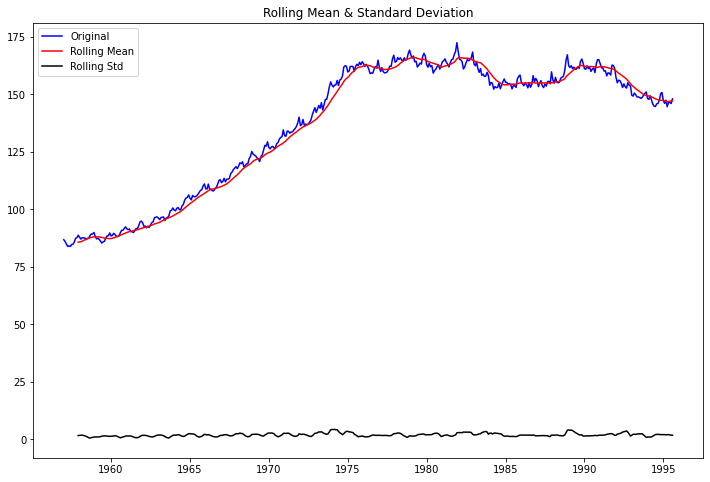

Results of Dickey-Fuller Test:
p-value = 0.3616. The series is likely non-stationary.
Test Statistic                  -1.838284
p-value                          0.361627
#Lags Used                      14.000000
Number of Observations Used    449.000000
Critical Value (1%)             -3.444998
Critical Value (5%)             -2.867999
Critical Value (10%)            -2.570210
dtype: float64


In [ ]:
# rolling mean
df['roll_mean'] = df['Monthly_beer_production'].rolling(window=13).mean()
test_stationarity(df['roll_mean'].dropna())

In [ ]:
# To check how many no. of diff we want to do
from pmdarima.arima.utils import ndiffs
ndiffs(df.Monthly_beer_production, test='adf')

0

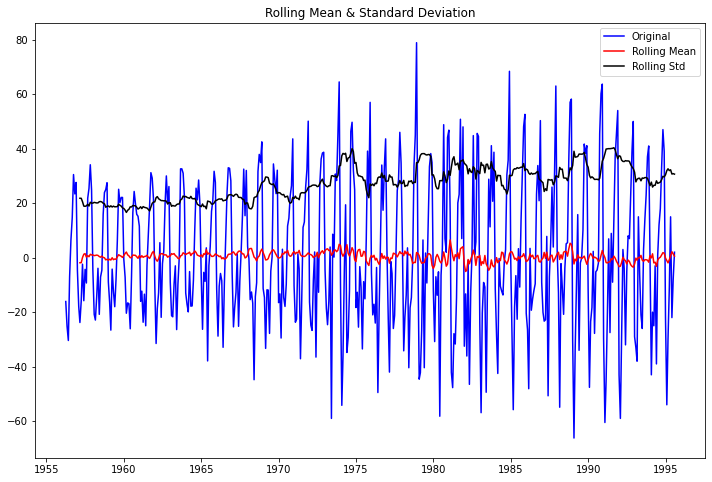

Results of Dickey-Fuller Test:
p-value = 0.0086. The series is likely stationary.
Test Statistic                  -3.476111
p-value                          0.008622
#Lags Used                      20.000000
Number of Observations Used    452.000000
Critical Value (1%)             -3.444900
Critical Value (5%)             -2.867956
Critical Value (10%)            -2.570187
dtype: float64


In [ ]:
# differencing
df['beer_prod_diff'] = df['Monthly_beer_production'] - df['Monthly_beer_production'].shift(3)
test_stationarity(df['beer_prod_diff'].dropna())

In [ ]:
new_df = df.copy()
new_df.dropna(inplace=True)
new_df

,Monthly_beer_production,log,roll_mean,beer_prod_diff
Month,,,,
1957-01-01,95.9,4.563306,86.800000,-4.7
1957-02-01,82.8,4.416428,86.000000,-17.9
1957-03-01,83.3,4.422449,85.023077,-23.8
1957-04-01,80.0,4.382027,83.853846,-15.9
1957-05-01,80.4,4.387014,84.107692,-2.4
...,...,...,...,...
1995-04-01,127.0,4.844187,144.615385,-11.0
1995-05-01,151.0,5.017280,146.538462,15.0
1995-06-01,130.0,4.867534,146.461538,-22.0


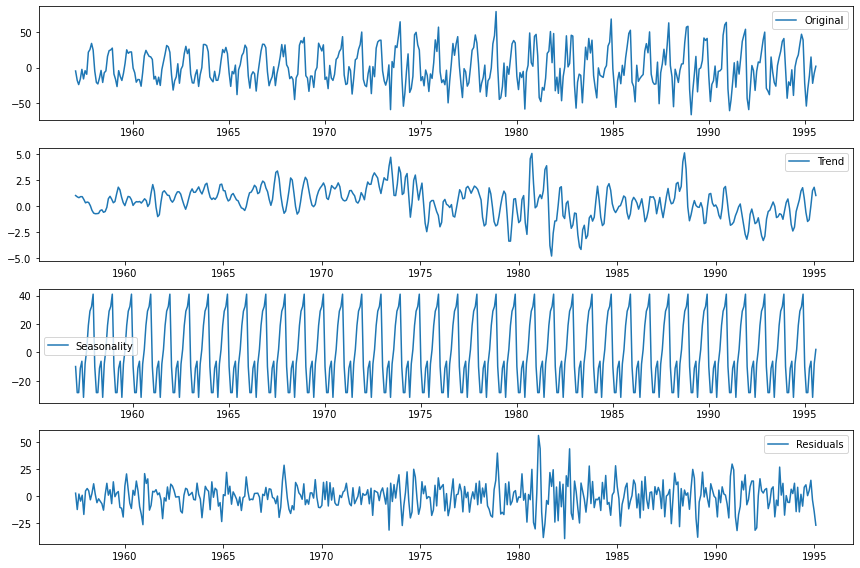

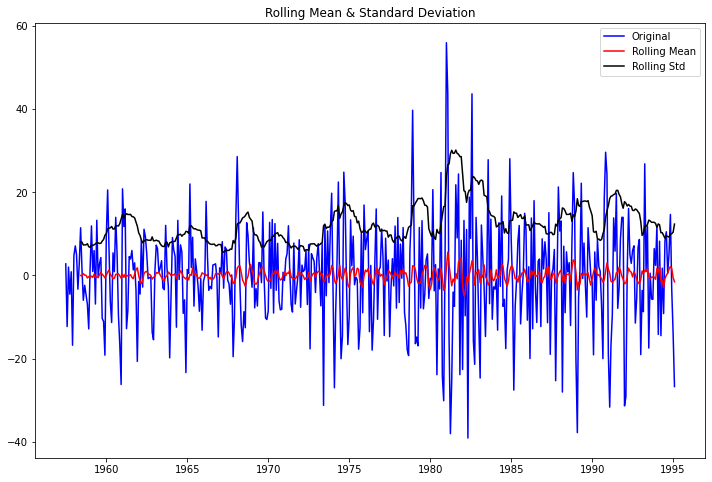

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.158385e+01
p-value                        2.899305e-21
#Lags Used                     1.800000e+01
Number of Observations Used    4.330000e+02
Critical Value (1%)           -3.445543e+00
Critical Value (5%)           -2.868238e+00
Critical Value (10%)          -2.570338e+00
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(new_df['beer_prod_diff'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(new_df['beer_prod_diff'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationarity(decomposed_log_data)

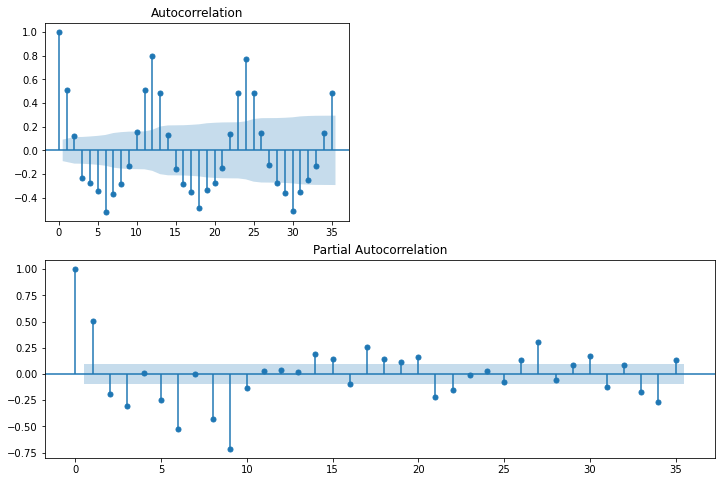

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(new_df['beer_prod_diff'],lags=35,ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df['beer_prod_diff'],lags=35,ax=ax2)
# p = 2, d = 0/1, q = 2

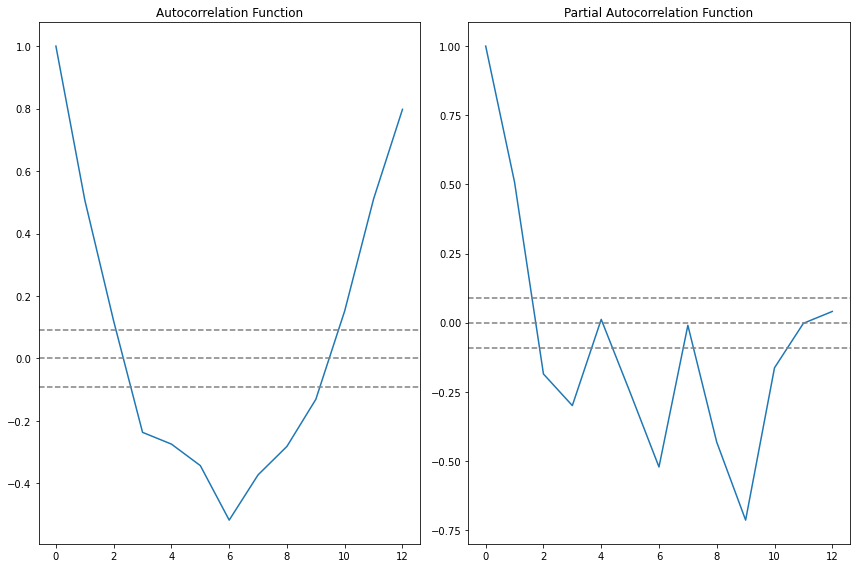

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(new_df['beer_prod_diff'], nlags=12)
lag_pacf = pacf(new_df['beer_prod_diff'], nlags=12, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series= new_df['beer_prod_diff']
# evaluate parameters
p_values = range(2,3)
d_values = range(0, 2)
q_values = range(2, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


ARIMA(2, 0, 2) RMSE=20.763
ARIMA(2, 0, 3) RMSE=20.293
ARIMA(2, 1, 2) RMSE=26.999
ARIMA(2, 1, 3) RMSE=21.995
Best ARIMA(2, 0, 3) RMSE=20.293


In [ ]:
y_train = df['Monthly_beer_production'][:380]
y_test  = df['Monthly_beer_production'][380:]

In [ ]:
# y_train = df['Monthly_beer_production'][:int(0.8*(len(df)))]
# y_test  = df['Monthly_beer_production'][int(0.8*(len(df))):]

# ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(y_train, order= (2,0,3))
result_ar = model.fit()

<AxesSubplot:xlabel='Month'>

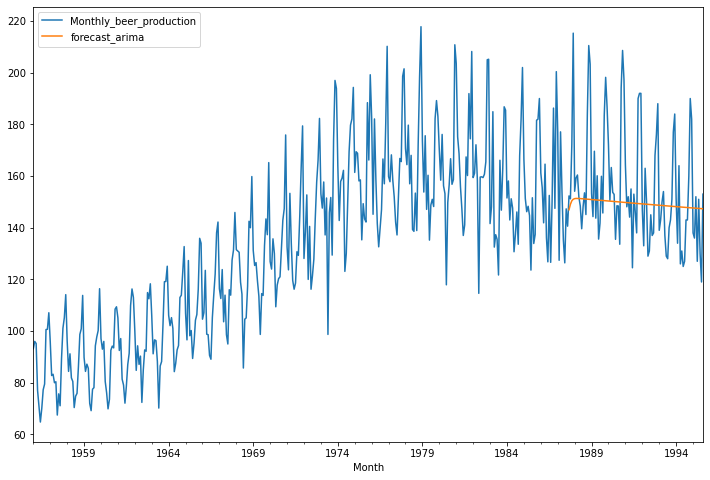

In [ ]:
df['forecast_arima'] = result_ar.predict(start = 380, end = 476 )
df[['Monthly_beer_production','forecast_arima']].plot()

In [ ]:
# df['forecast_arima'] = result_ar.predict(start = '1987-09-01', end = '1995-08-01' )
# df[['Monthly_beer_production','forecast_arima']].plot()

In [ ]:
df['forecast_arima'][380:390]

Month
1987-09-01    146.947719
1987-10-01    149.066626
1987-11-01    150.427243
1987-12-01    151.012265
1988-01-01    151.248436
1988-02-01    151.327725
1988-03-01    151.336488
1988-04-01    151.313570
1988-05-01    151.276446
1988-06-01    151.232978
Name: forecast_arima, dtype: float64

In [ ]:
y_test

Month
1987-09-01    152.3
1987-10-01    151.2
1987-11-01    172.2
1987-12-01    215.3
1988-01-01    154.1
              ...  
1995-04-01    127.0
1995-05-01    151.0
1995-06-01    130.0
1995-07-01    119.0
1995-08-01    153.0
Name: Monthly_beer_production, Length: 96, dtype: float64

In [ ]:
y_pred_ar = df['forecast_arima'][380:]
y_pred_ar

Month
1987-09-01    146.947719
1987-10-01    149.066626
1987-11-01    150.427243
1987-12-01    151.012265
1988-01-01    151.248436
                 ...    
1995-04-01    147.511391
1995-05-01    147.469087
1995-06-01    147.426855
1995-07-01    147.384694
1995-08-01    147.342605
Name: forecast_arima, Length: 96, dtype: float64

In [ ]:
df.index[-1]

Timestamp('1995-08-01 00:00:00')

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(months=i) for i in range(25)]
future_dates_df = pd.DataFrame(index= future_dates[1:], columns=df.columns)
future_dataframe = pd.concat([df, future_dates_df])
future_dataframe

,Monthly_beer_production,log,roll_mean,beer_prod_diff,forecast_arima
1956-01-01,93.2,4.534748,NaN,NaN,NaN
1956-02-01,96.0,4.564348,NaN,NaN,NaN
1956-03-01,95.2,4.555980,NaN,NaN,NaN
1956-04-01,77.1,4.345103,NaN,-16.1,NaN
1956-05-01,70.9,4.261270,NaN,-25.1,NaN
...,...,...,...,...,...
1997-04-01,NaN,NaN,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN,NaN,NaN
1997-07-01,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

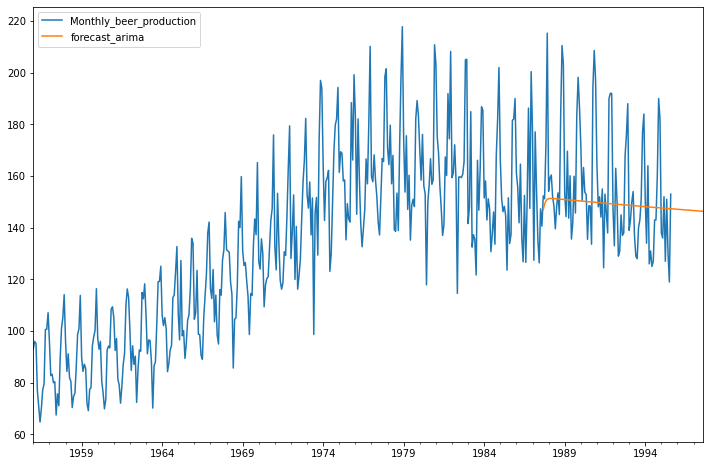

In [ ]:
future_dataframe['forecast_arima'] = result_ar.predict(start = 380, end = 500 )
future_dataframe[['Monthly_beer_production','forecast_arima']].plot()

In [ ]:
future_dataframe[476:]

,Monthly_beer_production,log,roll_mean,beer_prod_diff,forecast_arima
1995-09-01,NaN,NaN,NaN,NaN,147.300588
1995-10-01,NaN,NaN,NaN,NaN,147.258642
1995-11-01,NaN,NaN,NaN,NaN,147.216767
1995-12-01,NaN,NaN,NaN,NaN,147.174964
1996-01-01,NaN,NaN,NaN,NaN,147.133231
1996-02-01,NaN,NaN,NaN,NaN,147.091570
1996-03-01,NaN,NaN,NaN,NaN,147.049980
1996-04-01,NaN,NaN,NaN,NaN,147.008460
1996-05-01,NaN,NaN,NaN,NaN,146.967011
1996-06-01,NaN,NaN,NaN,NaN,146.925632


In [ ]:
def MAPE(y_test, y_pred): # mean absolute percentage error
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs(y_test-y_pred)/y_test)*100

In [ ]:
MAPE(y_test,y_pred_ar)
# model is 90.1 % accurate

9.90441621260334

# SARIMA Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(y_train, order = (2,0,3), seasonal_order=(2,0,3,12))
result_sar = sarima.fit()

<AxesSubplot:xlabel='Month'>

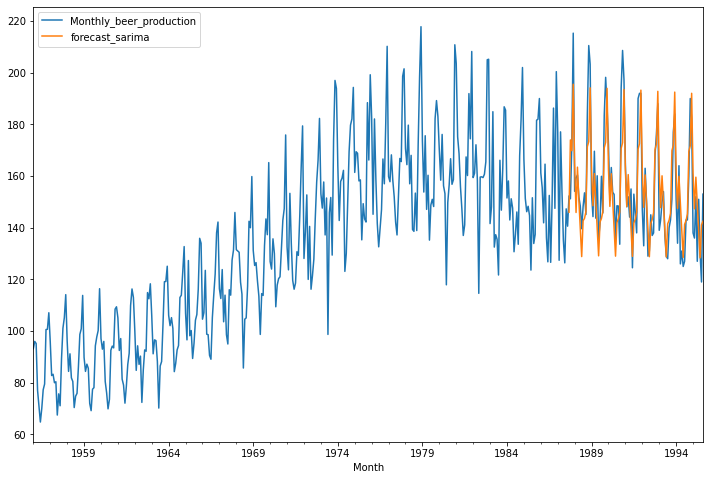

In [ ]:
df['forecast_sarima'] = result_sar.predict(start = 380, end = 476 )
df[['Monthly_beer_production','forecast_sarima']].plot()

In [ ]:
y_pred_sar = df['forecast_sarima'][380:476]
y_pred_sar.head(12)

Month
1987-09-01    146.015010
1987-10-01    173.980114
1987-11-01    169.792439
1987-12-01    195.531151
1988-01-01    164.544984
1988-02-01    145.894515
1988-03-01    163.439881
1988-04-01    150.543584
1988-05-01    139.549558
1988-06-01    128.833096
1988-07-01    142.694616
1988-08-01    143.609775
Name: forecast_sarima, dtype: float64

<AxesSubplot:>

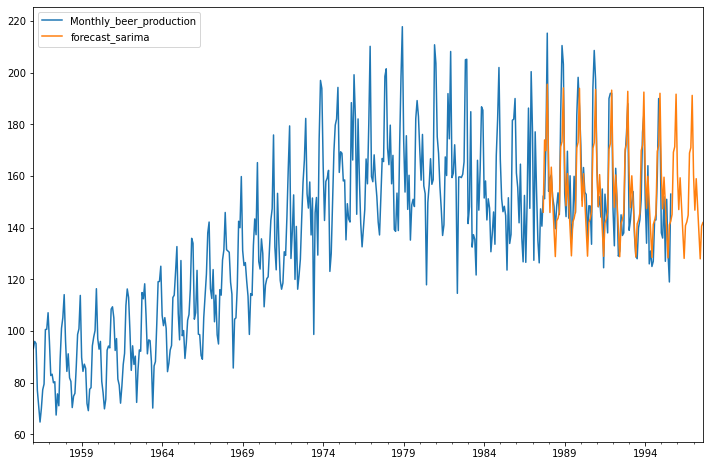

In [ ]:
future_dataframe['forecast_sarima'] = result_sar.predict(start = 380, end = 500 )
future_dataframe[['Monthly_beer_production','forecast_sarima']].plot()

In [ ]:
future_dataframe['forecast_sarima'][476:]

1995-09-01    145.124818
1995-10-01    169.218942
1995-11-01    171.311325
1995-12-01    191.675563
1996-01-01    160.890550
1996-02-01    147.025515
1996-03-01    159.320862
1996-04-01    148.719795
1996-05-01    138.736823
1996-06-01    128.141250
1996-07-01    140.843168
1996-08-01    142.269012
1996-09-01    144.858872
1996-10-01    168.911897
1996-11-01    171.001073
1996-12-01    191.207669
1997-01-01    160.549445
1997-02-01    146.799102
1997-03-01    158.970133
1997-04-01    148.488093
1997-05-01    138.493547
1997-06-01    127.959390
1997-07-01    140.615702
1997-08-01    142.000820
Name: forecast_sarima, dtype: float64

In [ ]:
MAPE(y_test,y_pred_sar)
# model is approx 94 % accurate

6.092556371120702